In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('spam.tsv',sep='\t')

In [3]:
data.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
data.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [5]:
data.tail()

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


In [6]:
data.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [7]:
per = data['label'].value_counts() / len(data) * 100

In [8]:
np.round(per) 

label
ham     87.0
spam    13.0
Name: count, dtype: float64

In [9]:
# imbalance dataset

In [10]:
ham = data[data['label'] == 'ham']
spam = data[data['label'] == 'spam']

In [11]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [12]:
ham = ham.sample(spam.shape[0])

In [13]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [14]:
# now the data is balanced

In [15]:
new_data = pd.concat([ham,spam], ignore_index=True)

In [16]:
new_data['label'].value_counts()

label
ham     747
spam    747
Name: count, dtype: int64

In [17]:
new_data.head()

,label,message,length,punct
0,ham,Hi this is yijue... It's regarding the 3230 te...,121,13
1,ham,:),3,2
2,ham,No de.am seeing in online shop so that i asked.,47,2
3,ham,Lol I would but despite these cramps I like be...,57,1
4,ham,"Oh right, ok. I'll make sure that i do loads o...",149,5


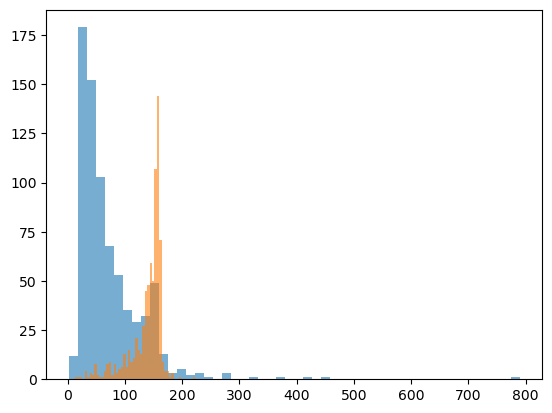

In [18]:
plt.hist(new_data[new_data['label'] == 'ham']['length'], bins = 50, alpha = 0.6)
plt.hist(new_data[new_data['label'] == 'spam']['length'], bins = 50, alpha = 0.6)
plt.show()

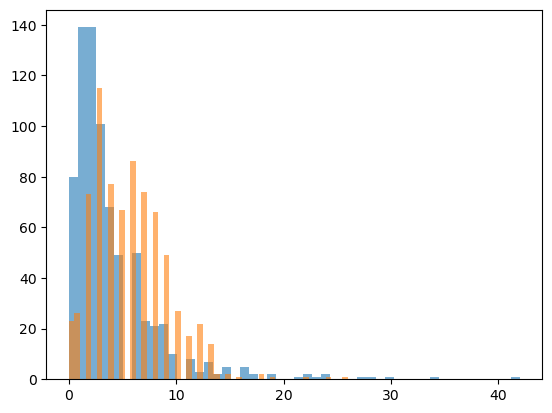

In [19]:
plt.hist(new_data[new_data['label'] == 'ham']['punct'], bins = 50, alpha = 0.6)
plt.hist(new_data[new_data['label'] == 'spam']['punct'], bins = 50, alpha = 0.6)
plt.show()

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = new_data['message']
y = new_data['label']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0, shuffle=True)

In [23]:
747 *2

1494

In [24]:
1494 * 0.3

448.2

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

In [26]:
classifier = Pipeline([('tfidf', TfidfVectorizer()), ('RandomForestClassifier', RandomForestClassifier(n_estimators=100))])

In [27]:
classifier.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('RandomForestClassifier', RandomForestClassifier())])

In [28]:
y_pred = classifier.predict(X_test)

In [29]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [30]:
accuracy_score(y_test,y_pred)

0.955456570155902

In [31]:
0.9465 * 449

424.9785

In [32]:
confusion_matrix(y_test,y_pred)

array([[224,   3],
       [ 17, 205]], dtype=int64)

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.93      0.99      0.96       227
        spam       0.99      0.92      0.95       222

    accuracy                           0.96       449
   macro avg       0.96      0.96      0.96       449
weighted avg       0.96      0.96      0.96       449



In [34]:
from sklearn.svm import SVC

In [35]:
svm_classifier = Pipeline([('tfidf', TfidfVectorizer()), ('Suppoer Vector Machine', SVC(C=100, gamma='scale'))])

In [36]:
svm_classifier.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('Suppoer Vector Machine', SVC(C=100))])

In [37]:
y_pred = svm_classifier.predict(X_test)

In [38]:
accuracy_score(y_test,y_pred)

0.9665924276169265

In [39]:
confusion_matrix(y_test,y_pred)

array([[221,   6],
       [  9, 213]], dtype=int64)

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.96      0.97      0.97       227
        spam       0.97      0.96      0.97       222

    accuracy                           0.97       449
   macro avg       0.97      0.97      0.97       449
weighted avg       0.97      0.97      0.97       449



In [41]:
test1 = ['Hey! I hope you are enjoying the course']
test2 = ['If you enjoyed the curriculum rate us 5']
test3 = ['Congratulations! you have won 1 crore rupees loan ammount! Call 9676811480 to claim the ammount!']
test4 = ['hey dear, call on 4445552221 for a service! ;)']

In [42]:
print(classifier.predict(test1))
print(classifier.predict(test2))
print(classifier.predict(test3))
print(classifier.predict(test4))

['ham']
['ham']
['spam']
['spam']


In [43]:
print(svm_classifier.predict(test1))
print(svm_classifier.predict(test2))
print(svm_classifier.predict(test3))
print(svm_classifier.predict(test4))

['ham']
['ham']
['spam']
['spam']
